In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(f"x train shape is: {x_train.shape}")
print(f"y train shape is: {y_train.shape}")
print(f"x test shape is: {x_test.shape}")
print(f"y test shape is: {y_test.shape}")

x train shape is: (50000, 32, 32, 3)
y train shape is: (50000, 1)
x test shape is: (10000, 32, 32, 3)
y test shape is: (10000, 1)


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()

In [ ]:
k=len(set(y_train))
print(f"Number of classes is:{k}")

Number of classes is:10


In [ ]:
labels= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


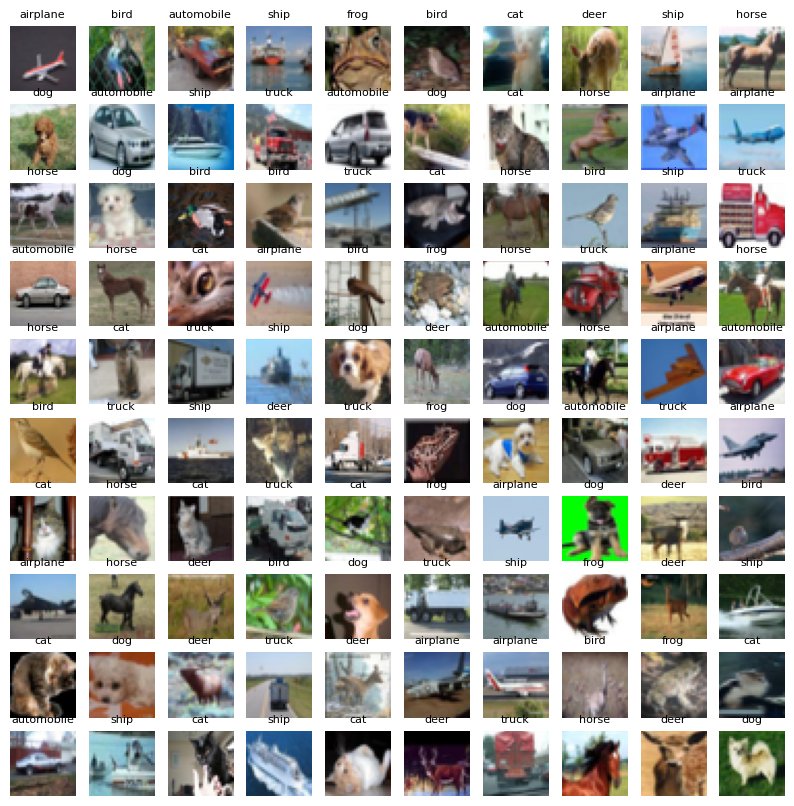

In [ ]:
W_grid=10
L_grid=10
fig,axes=plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_train=len(x_train)
for i in np.arange(0,W_grid*L_grid):
  index=np.random.randint(0,n_train)
  axes[i].imshow(x_train[index])
  label_index=int(y_train[index])
  axes[i].set_title(labels[label_index],fontsize=8)
  axes[i].axis('off')

<Figure size 640x480 with 0 Axes>

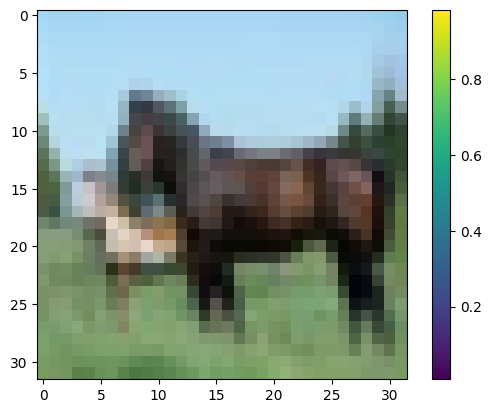

In [ ]:
plt.subplots_adjust(hspace=0.4)
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.show()

In [ ]:
model=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f"\nTest Accuracy:{test_accuracy*100:.2f}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.3377 - loss: 1.7760 - val_accuracy: 0.5240 - val_loss: 1.3045
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5586 - loss: 1.2355 - val_accuracy: 0.6065 - val_loss: 1.1111
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6263 - loss: 1.0551 - val_accuracy: 0.6270 - val_loss: 1.0639
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6686 - loss: 0.9523 - val_accuracy: 0.6593 - val_loss: 0.9718
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6902 - loss: 0.8827 - val_accuracy: 0.6722 - val_loss: 0.9571
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7146 - loss: 0.8130 - val_accuracy: 0.6747 - val_loss: 0.9265
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7329 - loss: 0.7673 - val_accuracy: 0.6889 - val_loss: 0.9234
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7496 - loss: 0.7204 

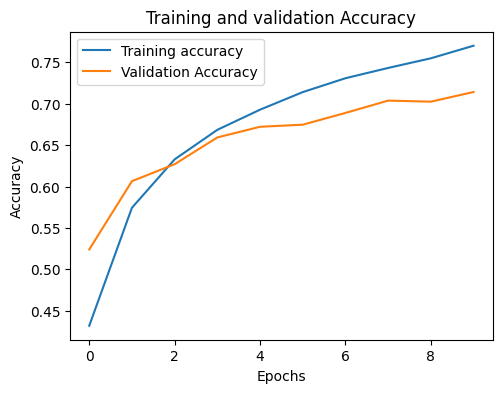

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

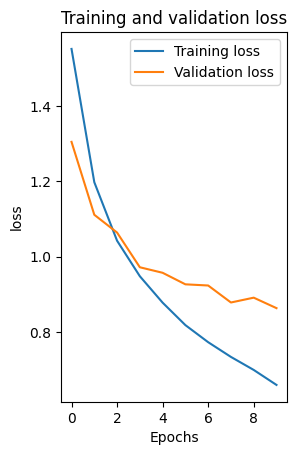

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


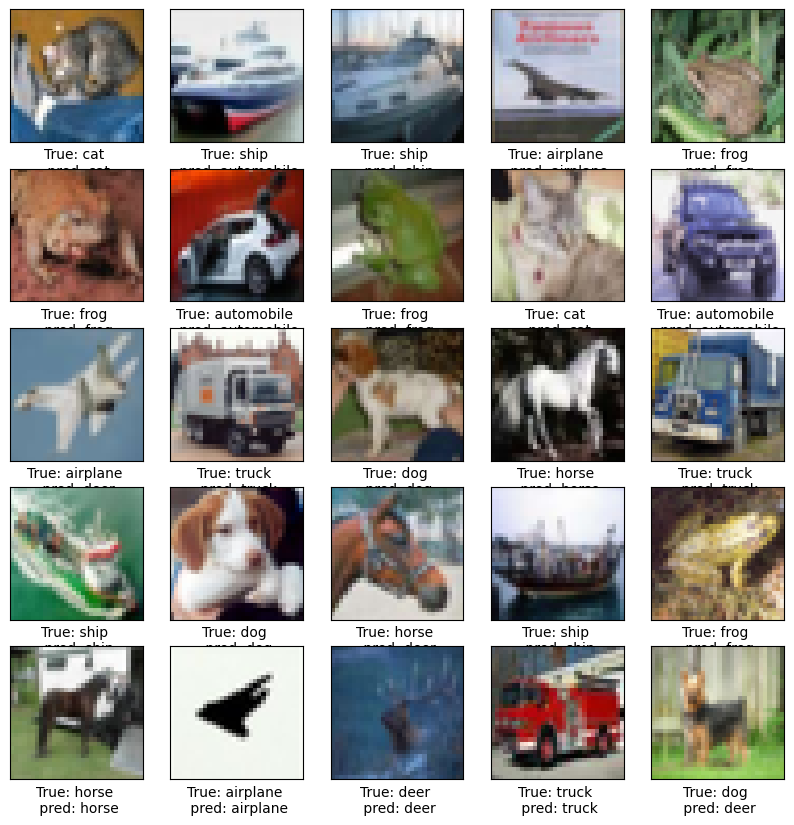

In [ ]:
predictions=model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i])
  plt.xlabel(f"True: {labels[y_test[i]]} \n pred: {labels[np.argmax(predictions[i])]}")
plt.show()

In [ ]:
def predict_image(index):
  image=x_test[index]
  prediction=model.predict(np.expand_dims(image,axis=0))
  predicted_class=np.argmax(prediction)
  plt.imshow(image)
  plt.title(f"Predicted: {labels[predicted_class]},Actual: {labels[y_test[index]]}")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


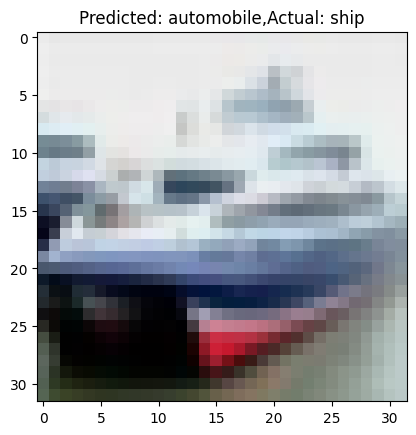

In [ ]:
predict_image(1)

In [ ]:
model=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                         layers.Conv2D(32,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(128,(3,3),activation='relu'),
                         layers.Conv2D(128,(3,3),activation='relu'),
                         layers.Flatten(),
                         layers.Dense(256,activation='relu'),
                         layers.Dense(10,activation='softmax')
                         ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,602 (1.23 MB)

 Trainable params: 322,602 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f"test accuracy:{test_accuracy}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3152 - loss: 1.8307 - val_accuracy: 0.5614 - val_loss: 1.2099
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5895 - loss: 1.1461 - val_accuracy: 0.6438 - val_loss: 0.9996
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6728 - loss: 0.9235 - val_accuracy: 0.6635 - val_loss: 0.9518
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7195 - loss: 0.7991 - val_accuracy: 0.7204 - val_loss: 0.8183
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7521 - loss: 0.6978 - val_accuracy: 0.7203 - val_loss: 0.8091
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7849 - loss: 0.6102 - val_accuracy: 0.7149 - val_loss: 0.8223
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8038 - loss: 0.5564 - val_accuracy: 0.7243 - val_loss: 0.8124
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8223 - loss: 0.499

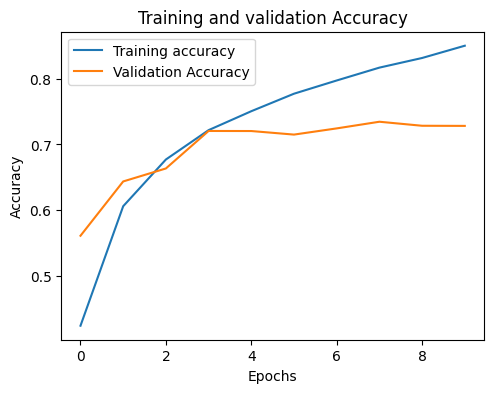

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

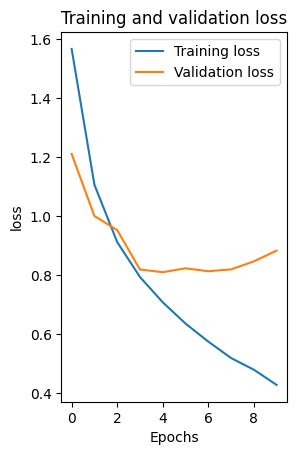

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()